# 第3章 k-nearest neighbor, k-NN

在这一章，用python实现k-NN算法，使用数据集为iris数据集，同时最后调用sklearn的k-NN库函数也进行测试。

k-NN三要素：距离度量，k值的选择，分类决策规则决定

k-NN使用的距离度量为欧氏距离，使用的分类决策规则决定为多数表决，其k值一般通过采用交叉验证法选取一个比较小的数。

### 距离度量：实现书中例3.1
在$L_p(x_i,x_j)=\left(\sum_{l=1}^{n}{\left|{x_i^{(l)}-x_j^{(l)}}\right|^p}\right)^{\frac{1}{p}}$距离中：
- p = 1: 曼哈顿距离
- p = 2: 欧氏距离
- p = inf: 闵式距离

In [1]:
# import packages
import math

In [2]:
# Lp distance
def Lp_distance(x, y, p=2):
    len_x = len(x)
    if len_x == len(y) and len_x > 0:
        lp = 0
        for i in range(len_x):
            lp += math.pow(abs(x[i] - y[i]), p)
        return math.pow(lp, 1/p)
    else:
        print('Error!')
        return 0

In [3]:
# eg.3.1 in the book
x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]

# for i in range(1, 5):
#     r = { '1-{}'.format(c):Lp_distance(x1, c, p=i) for c in [x2, x3]}
#     print(min(zip(r.values(), r.keys())))
for i in range(1, 5):
    distance = {'When p = {}, the nearest neighbor of x1 is: {}'.format(i, d):Lp_distance(x1, d, p=i) for d in [x2, x3]}
    print(min(zip(distance.values(), distance.keys()))) # min function compare the first parameter

(4.0, 'When p = 1, the nearest neighbor of x1 is: [5, 1]')
(4.0, 'When p = 2, the nearest neighbor of x1 is: [5, 1]')
(3.7797631496846193, 'When p = 3, the nearest neighbor of x1 is: [4, 4]')
(3.5676213450081633, 'When p = 4, the nearest neighbor of x1 is: [4, 4]')


### k-NN
下面以iris数据集，实现最基本的k-NN算法（遍历所有数据点）

In [4]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

%matplotlib inline

In [5]:
# load data
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target

#reset the columns names
iris_df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [6]:
# select the data we are interested in
data = np.array(iris_df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sorted(a, key=lambda x:x[0])

sorted 是排序函数，由小到大排序。a是一个由元组组成的列表，我们对其进行操作时用到参数key, 也就是关键词。

上面这句命令，lambda是一个隐函数，是固定写法，不要写成别的单词；x表示列表中的一个元素，在这里，表示一个元组，x只是临时起的一个名字，可以使用任意的名字；x[0]表示元组里的第一个元素，当然第二个元素就是x[1]；所以这句命令的意思就是按照列表中第一个元素排序

若想实现sorted倒排序，使用参数reverse,即sorted(a, key=lambda x:x[0]， reverse=True)

In [7]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        self.neighbor = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X):
        # First calculate the distance between X and the first n elements in X_train, and as the shortest distance set
        knn_list = []
        for i in range(self.neighbor):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p) # np.linalg.norm is the Lp norm
            knn_list.append((dist, self.y_train[i]))
         
        # Traversing the entire dataset and finding the distance data with the shortest distance
        # Replace the largest distance in the knn_list with the new smaller distance
        for i in range(self.neighbor, len(self.X_train)):
            max_dist_index = knn_list.index(max(knn_list, key=lambda x:x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_dist_index][0] > dist:
                knn_list[max_dist_index] = (dist, self.y_train[i])
        
        # count the number of n nearest neighbors' label 
        knn_label = [k[-1] for k in knn_list]
        count_pairs = Counter(knn_label)

        # choose the most number of labels
        max_count_label = sorted(count_pairs, key=lambda x:x)[-1]
        return max_count_label
    
    def score(self, X_test, y_test):
        right_count = 0
        for X, y in zip(X_test, y_test):
            x_label = self.predict(X)
            if x_label == y:
                right_count +=1
        return right_count / len(X_test)

In [8]:
model = KNN(X_train, y_train)

In [9]:
model.score(X_test, y_test)

1.0

In [10]:
test_point = [6.0, 3.0]
print('Test Point Label: {}'.format(model.predict(test_point)))

Test Point Label: 1.0


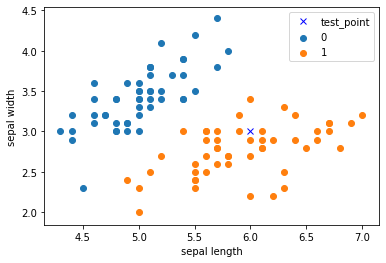

In [11]:
# visualization
plt.scatter(X[:50, 0], X[:50, 1], label='0')
plt.scatter(X[50:100, 0], X[50:100, 1], label='1')
plt.plot(test_point[0], test_point[1], 'bx', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### scikitlearn KNN
sklearn.neighbors.KNeighborsClassifier¶
- parameters:
- n_neighbors: 临近点个数
- p: 距离度量
- algorithm: 近邻算法，可选{'auto', 'ball_tree', 'kd_tree', 'brute'}
- weights: 确定近邻的权重

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# Call Library Function
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
clf_knn.score(X_test, y_test)

1.0